<h1>Условие</h1>

Дан .csv файл <br>
Нужно постороить график, при наведении на точку которого должна показываться ее координата

%matplotlib widget - магическая команда IPython, позволяет интерактивно взаимодействоать с граифком

In [1]:
%matplotlib widget
import csv
import matplotlib.pyplot as plt

Это функция чтения значений из csv файла.

In [2]:
def read_file(filename):
    with open(filename, "r") as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        headings = next(csv_reader)
        x = []
        y = []
        for line in csv_reader:
            x.append(float(line[0]))
            y.append(float(line[1]))
        return (headings, x, y)

Это функция, вызываемая при перемещениии мыши <br>
Отображет или скрывает аннотацию к точке

In [3]:
def hover(event):
    cont, ind = sc.contains(event)
    if cont:
        annot.xy = (event.xdata, event.ydata)
        annot.set_text("{}".format('; '.join([names[n] for n in ind["ind"]])))
        annot.set_visible(True)    
    else:
        annot.set_visible(False)

Читаем входной файл

In [4]:
filename = "data2.csv"
headings, x, y = read_file(filename)

Строим график

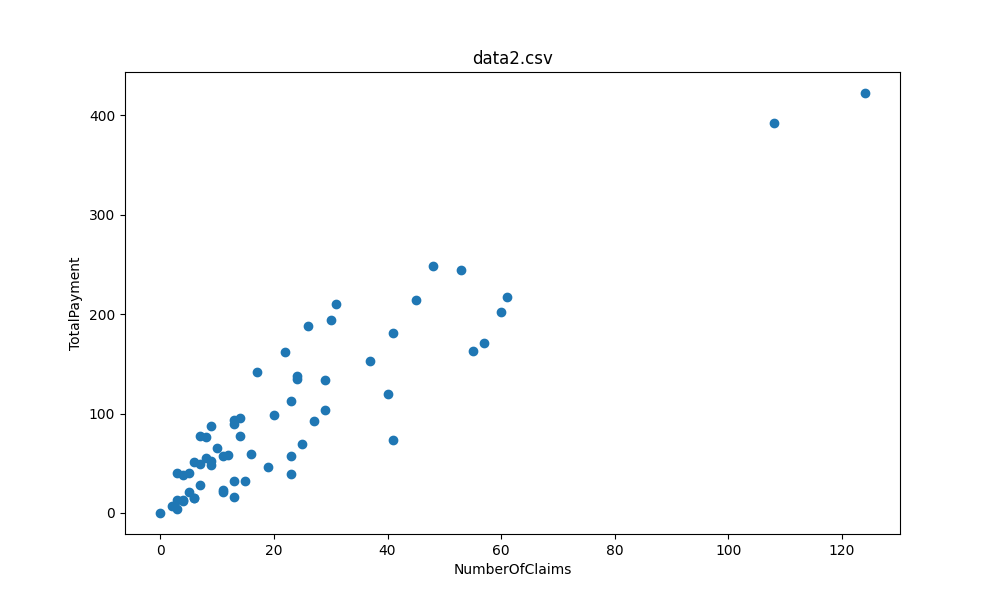

In [5]:
fig, ax = plt.subplots(1, figsize=(10,6))
fig.canvas.header_visible = False
sc = ax.scatter(x, y)
plt.title(filename)
plt.xlabel(headings[0])
plt.ylabel(headings[1])

annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)

names = [f"{x[i]}, {y[i]}" for i in range(len(x))]

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()